In [3]:
from google.colab import drive 
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [5]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz

In [6]:
# Đọc dữ liệu từ file CSV vào DataFrame
data = pd.read_csv('/content/drive/MyDrive/AI_Tailieu/src/ID3_playtennis_tiengviet.csv')
data

,Ngày,Quang cảnh,Nhiệt độ,Độ ẩm,Gió,Chơi tennis
0,D1,Nắng,Nóng,Cao,Nhẹ,Không
1,D2,Nắng,Nóng,Cao,Mạnh,Không
2,D3,Âm u,Nóng,Cao,Nhẹ,Có
3,D4,Mưa,Ấm áp,Cao,Nhẹ,Có
4,D5,Mưa,Mát,TB,Nhẹ,Có
5,D6,Mưa,Mát,TB,Mạnh,Không
6,D7,Âm u,Mát,TB,Mạnh,Có
7,D8,Nắng,Ấm áp,Cao,Nhẹ,không
8,D9,Nắng,Mát,TB,Nhẹ,Có
9,D10,Mưa,Ấm áp,TB,Nhẹ,Có


In [7]:
# Chia dữ liệu thành features và labels
X = data.iloc[:, 1:-1]  # các cột đầu tiên là các feature
X

,Quang cảnh,Nhiệt độ,Độ ẩm,Gió
0,Nắng,Nóng,Cao,Nhẹ
1,Nắng,Nóng,Cao,Mạnh
2,Âm u,Nóng,Cao,Nhẹ
3,Mưa,Ấm áp,Cao,Nhẹ
4,Mưa,Mát,TB,Nhẹ
5,Mưa,Mát,TB,Mạnh
6,Âm u,Mát,TB,Mạnh
7,Nắng,Ấm áp,Cao,Nhẹ
8,Nắng,Mát,TB,Nhẹ
9,Mưa,Ấm áp,TB,Nhẹ


In [8]:
y = data.iloc[:, -1]  # cột cuối là nhãn
y

0     Không
1     Không
2        Có
3        Có
4        Có
5     Không
6        Có
7     không
8        Có
9        Có
10       Có
11       Có
12       Có
13    Không
Name: Chơi tennis, dtype: object

In [9]:
from sklearn.preprocessing import LabelEncoder 
labelencoder_X = LabelEncoder()
X = X.apply(LabelEncoder().fit_transform)
X

,Quang cảnh,Nhiệt độ,Độ ẩm,Gió
0,1,1,0,1
1,2,1,0,0
2,3,1,0,1
3,0,2,0,1
4,0,0,1,1
5,0,0,1,0
6,3,0,1,0
7,1,2,0,1
8,1,0,1,1
9,0,2,1,1


In [29]:
# Tạo cây quyết định với thuật toán ID3
dt = DecisionTreeClassifier(criterion='entropy')
dt.fit(X.values, y)

DecisionTreeClassifier(criterion='entropy')

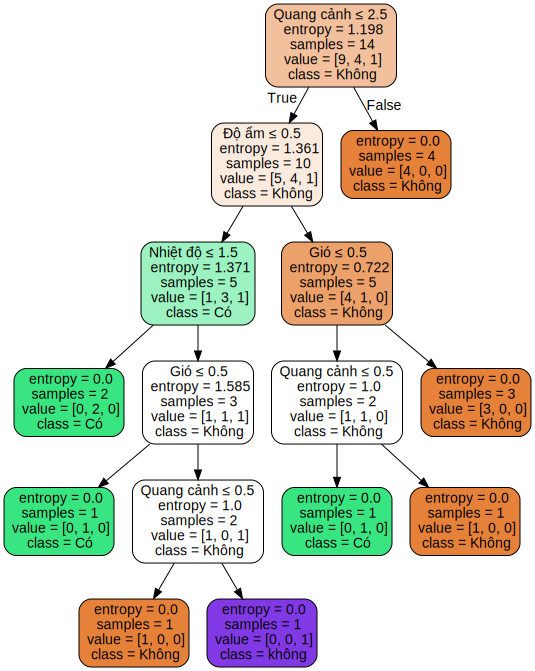

In [30]:
# Vẽ cây quyết định bằng graphviz
dot_data = export_graphviz(dt, out_file=None, 
                           feature_names=X.columns,  
                           class_names=y.unique(),  
                           filled=True, rounded=True,  
                           special_characters=True)  
graph = graphviz.Source(dot_data)
graph

In [31]:
# Đự đoán kết quả dự vào cho một mẫu tin có sẵn
from sklearn.metrics import accuracy_score
import numpy as np

# Dự đoán kết quả quyết định từ mẫu tin D7
X_d7 = X.iloc[6, :] # Lấy dữ liệu của mẫu tin D7
y_d7 = dt.predict([X_d7]) # Dự đoán kết quả quyết định từ mẫu tin D7
y_d7

array(['Có'], dtype=object)

In [32]:
# Đự đoán kết quả dự vào cho một mẫu tin bất kỳ
from sklearn.metrics import accuracy_score
import numpy as np

dt.fit(X.iloc[:,:],y) # hàm .fit là Huấn luyện mô hình (train module)
X_in = np.array([1, 0, 1, 0])
y_pred = dt.predict([X_in]) # .predict : Hàm dự đoán . Đưa ra kết quả kiểu thử
y_pred # Trả về nhánh bất kỳ

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['Không'], dtype=object)